In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("IMDB-Movie-Data.csv")


x=dataset.iloc[:,[8,9]].values


# Elbow Plot

[35595705761882.914, 13532547086530.379, 7642616885048.815, 4275788542537.2837, 2810480281684.533, 1942331094130.105, 1334153418279.0647, 1008934533225.3286, 760931504156.4761, 620016761299.4514]


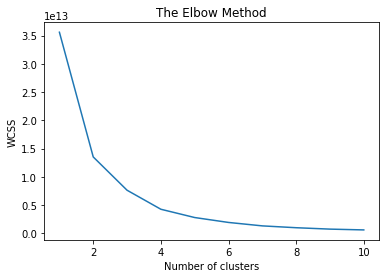

In [3]:
from sklearn.cluster import KMeans
# making a wcss list which will contain wcss values for the respective cluster number
wcss = []
# starting a for loop to provide the different cluster values
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    k_means.fit(x)
# to get the wcss value KMeans class provides us an inbuilt function 'inertia_'
    wcss.append(k_means.inertia_)
print(wcss)
x_range = range(1,11)
plt.plot(x_range,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [4]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

# Cluster plot with n_cluster=4

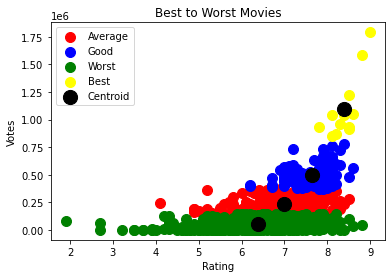

In [5]:
plt.scatter(x[y_kmeans == 0,0] , x[y_kmeans == 0,1], s = 100, c = "red", label = "Average")
plt.scatter(x[y_kmeans == 1,0] , x[y_kmeans == 1,1], s = 100, c = "blue", label = "Good")
plt.scatter(x[y_kmeans == 2,0] , x[y_kmeans == 2,1], s = 100, c = "green", label = "Worst")
plt.scatter(x[y_kmeans == 3,0] , x[y_kmeans == 3,1], s = 100, c = "yellow", label = "Best")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 200, c = "black", label = "Centroid")

plt.title("Best to Worst Movies")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.legend()
plt.show()